In [1]:
#from yahoo_finance import Share
# changed to https://github.com/cgoldberg/ystockquote
# changed to yfinance
import yfinance as yf
import ystockquote
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import random
import pandas_datareader.data as web
import pandas as pd

In [2]:
def get_prices(share_symbol, start_date, end_date,
               cache_filename='../../data/cache/stock_prices.npy', force=False):
    try:
        if force:
            raise IOError
        else:
            stock_prices = np.load(cache_filename)
    except IOError:
        #share = Share(share_symbol)
        #stock_hist = ystockquote.get_historical_prices(share_symbol, start_date, end_date)
        stock_hist = yf.download(share_symbol, start=start_date, end=end_date)
        #stock_hist = share.get_historical(start_date, end_date)
        stock_prices = []
        stock_hist = stock_hist.sort_values(by=['Date'])
        for index, day in stock_hist.iterrows():
            stock_val = day['Open'].astype(float)
            stock_prices.append(stock_val)
            
        stock_prices = np.asarray(stock_prices)
        #stock_prices = [stock_price['Open'] for stock_price in stock_hist]
        np.save(cache_filename, stock_prices)
        
    return stock_prices.astype(float)

In [3]:
def plot_prices(prices):
    plt.title('Opening stock prices')
    plt.xlabel('day')
    plt.ylabel('price ($)')
    plt.plot(prices)
    plt.savefig('../../data/cache/prices.png')
    plt.show()

[*********************100%***********************]  1 of 1 completed


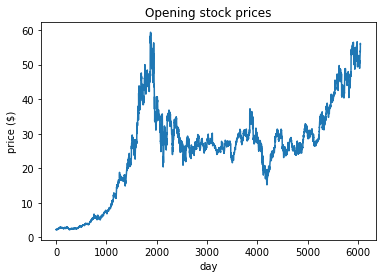

In [4]:
prices = get_prices('MSFT', '1992-07-22', '2016-07-22', force=True)
plot_prices(prices)

In [5]:
df = web.get_data_yahoo("MSFT", '1992-07-22', '2016-07-22')

In [6]:
new_df = df.drop(['High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1)

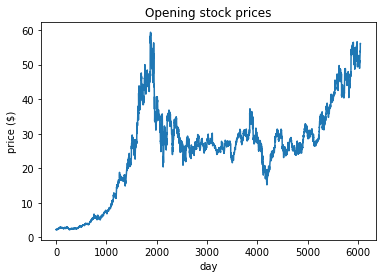

In [7]:
plot_prices(new_df.values)
# does not look like the one in the book